In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.cluster.hierarchy as sc
import scipy.spatial.distance as sc_dist
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform


In [3]:
df = pd.read_excel("/Users/alexandrebredillot/Documents/GitHub/EXP_GO/EDH - /Data Mining/General/Ring_simulation.xlsx")

In [4]:
print(df.head())

   -1.041510  -1.193349
0   0.169768   0.882005
1  -0.292642   0.413495
2  -2.376635   1.367621
3   1.692133  -0.696131
4  -0.662716   0.182341


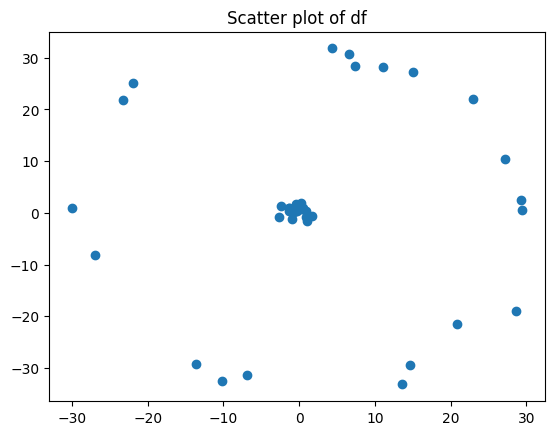

In [5]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title("Scatter plot of df")
plt.show()

In [ ]:
# Calculer la matrice de distance euclidienne



# pdist calcule les distances par paires, squareform la convertit en  matrice carrée
# Utiliser les fonctions via l'alias sc_dist importé dans une cellule précédente
proximity_matrix = sc_dist.squareform(sc_dist.pdist(df.values, metric='euclidean'))

# Convertir en DataFrame pour mieux visualiser
proximity_df = pd.DataFrame(proximity_matrix, 
                            index=range(len(df)), 
                            columns=range(len(df)))

# Distance entre la première et la deuxième observation
distance_1_2 = proximity_matrix[0, 1]

print(f"Distance entre observation 1 et observation 2: {distance_1_2:.6f}")
print(f"\nPremières lignes de la matrice de proximité:")
print(proximity_df.head())

# Ou manuellement avec numpy
x1 = df.iloc[0].values
x2 = df.iloc[1].values
manual_distance = np.sqrt(np.sum((x1 - x2)**2))
print(f"\nVérification (calcul manuel): {manual_distance:.6f}")

Distance entre observation 1 et observation 2: 2.129285

Premières lignes de la matrice de proximité:
       0         1         2         3         4         5         6     \
0  0.000000  2.129285  2.919997  0.546088  0.677685  1.359597  2.259866   
1  2.129285  0.000000  1.766919  1.846505  1.452440  1.197912  4.113952   
2  2.919997  1.766919  0.000000  2.963438  2.433733  1.572699  4.053623   
3  0.546088  1.846505  2.963438  0.000000  0.530142  1.407431  2.797147   
4  0.677685  1.452440  2.433733  0.530142  0.000000  0.879685  2.822193   

       7         8         9     ...       1990       1991       1992  \
0  0.439776  1.758535  1.368596  ...  37.807991  38.585148  39.514719   
1  2.046358  1.287128  1.114603  ...  37.374511  40.652624  37.401649   
2  2.578782  1.161489  2.639206  ...  39.069386  41.293732  37.462769   
3  0.877960  1.836196  0.901694  ...  37.311281  38.806120  39.133257   
4  0.710284  1.308634  0.809100  ...  37.630420  39.235173  38.839185   

        

In [22]:
y = df.to_numpy()

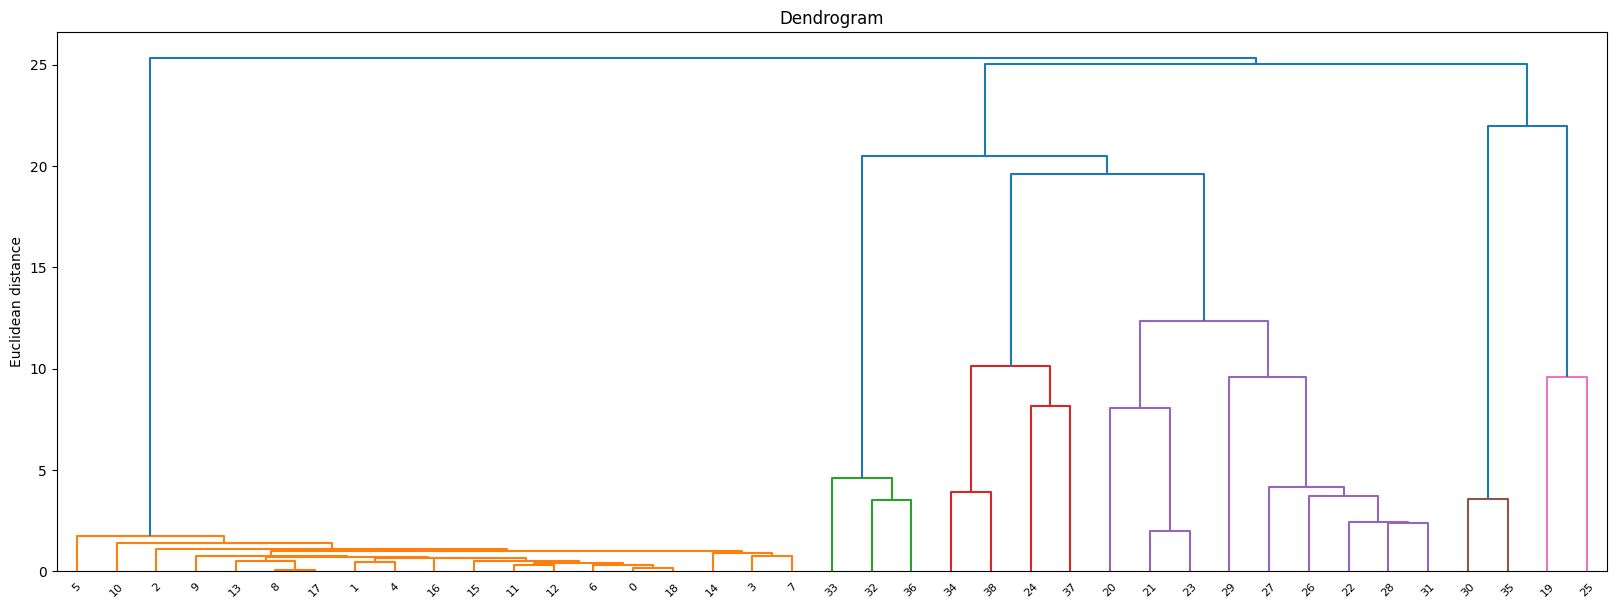

In [23]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
sc.dendrogram(sc.linkage(y, method='single'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()